In [39]:
import numpy as np
from tqdm import tqdm

In [40]:
# Data Generation
def generate_linear(n= 100):
    pts = np.random.uniform(0, 1, (n, 2))
    inputs = []
    labels = []
    for pt in pts:
        inputs.append([pt[0], pt[1]])
        distance = (pt[0] - pt[1]) / 1.414
        if pt[0] > pt[1]:
            labels.append(0)
        else:
            labels.append(1)
    return  np.array(inputs), np.array(labels).reshape(n, 1)


def generate_XOR_easy():
    inputs = []
    labels = []

    for i in range(11):
        inputs.append([0.1 *i, 0.1 * i])
        labels.append(0)

        if 0.1 * i == 0.5:
            continue

        inputs.append([0.1 * i, 1 - 0.1 * i])
        labels.append(1)
    
    return  np.array(inputs), np.array(labels).reshape(21, 1)

In [41]:
class Linear:
    def __init__(self, in_features, out_features, bias= True):
        # y = Wx + b 
        k = 1.0 / in_features
        self.weight = np.random.uniform(-np.sqrt(k), np.sqrt(k), (out_features, in_features))
        self.bias = np.random.uniform(-np.sqrt(k), np.sqrt(k), (out_features))
        self.weight_grad = 0
        self.bias_grad = 0
    def __call__(self, x):
        return self.forward(x)

    def forward(self, x):
        # input matrix W + bias
        self.a = x
        self.z = np.matmul(x, self.weight.T) + self.bias
        return self.z
    
    def update(self, lr= 1e-4):

        self.weight -= (lr * self.weight_grad).T
        self.bias -= lr * self.bias_grad

In [42]:
# activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [43]:
class linear_model:
    def __init__(self, in_features, out_features):
        # hidden layer 1
        self.linear_1 = Linear(in_features, 128)
        # hidden layer 2
        self.linear_2 = Linear(128, 32)
        # hidden layer 3
        self.linear_3 = Linear(32, out_features)
    
    def __call__(self, x):
        return self.forward(x)

    def forward(self, x):
        x = self.linear_1(x)
        x = sigmoid(x)
        x = self.linear_2(x)
        x = sigmoid(x)
        x = self.linear_3(x)
        return sigmoid(x)
    
    def backward(self, x):
        
        grad_a3 = x
        grad_z3 = sigmoid_derivative(self.linear_3.z) * grad_a3 
        
        grad_a2 = np.matmul(grad_z3, self.linear_3.weight)
        grad_z2 = sigmoid_derivative(self.linear_2.z) * grad_a2

        grad_a1 = np.matmul(grad_z2, self.linear_2.weight)
        grad_z1 = sigmoid_derivative(self.linear_1.z) * grad_a1 

        self.linear_3.weight_grad = np.matmul(self.linear_3.a.T, grad_z3)
        self.linear_3.bias_grad = np.sum(grad_z3, axis= 0)
        
        self.linear_2.weight_grad = np.matmul(self.linear_2.a.T, grad_z2)
        self.linear_2.bias_grad = np.sum(grad_z2, axis= 0)

        self.linear_1.weight_grad = np.matmul(self.linear_1.a.T, grad_z1)
        self.linear_1.bias_grad = np.sum(grad_z1, axis= 0)

    def update(self, lr= 1e-4):
        self.linear_3.update(lr)
        self.linear_2.update(lr)
        self.linear_1.update(lr)

In [51]:
# hyperparameter
epoch = 100000
learning_rate = 1e-4

In [52]:
x, y = generate_linear(n = 100)
# x, y = generate_XOR_easy()
model = linear_model(2, 1) 

In [53]:
for i in range(epoch):
    # prediction
    pred = model(x)
    
    # MSE loss
    MSE_loss = ((pred - y) ** 2).mean()
    if (i + 1) % 10000 == 0:
        print(f"Epoch: {i}, Loss: {MSE_loss}")
    # cal
    grad_y = -2 * (y - pred)
    model.backward(grad_y)
    model.update(lr= learning_rate)

Epoch: 9999, Loss: 0.19741049552096498
Epoch: 19999, Loss: 0.07555434392131155
Epoch: 29999, Loss: 0.045077639996876556
Epoch: 39999, Loss: 0.03301575540123762
Epoch: 49999, Loss: 0.026380332535351565
Epoch: 59999, Loss: 0.022128009314325476
Epoch: 69999, Loss: 0.019158289627495016
Epoch: 79999, Loss: 0.016963123831641357
Epoch: 89999, Loss: 0.015272620991286658
Epoch: 99999, Loss: 0.013929357768944906


In [54]:
for p_y, g_y in zip(pred, y):
    print(p_y, g_y)


[0.99970582] [1]
[0.99994681] [1]
[0.00020241] [0]
[0.69461044] [1]
[0.99977164] [1]
[0.99790428] [1]
[0.99999637] [1]
[9.14118487e-06] [0]
[0.47975049] [0]
[0.97804203] [1]
[0.91383424] [1]
[0.74377197] [1]
[0.99996926] [1]
[0.96429142] [1]
[0.99999721] [1]
[0.99979948] [1]
[0.00137644] [0]
[0.99996748] [1]
[0.99994782] [1]
[0.99999662] [1]
[3.28768709e-06] [0]
[0.99999841] [1]
[0.00339824] [0]
[0.02269414] [0]
[0.99999633] [1]
[0.7867473] [1]
[0.98135616] [1]
[0.00048412] [0]
[0.00022643] [0]
[0.99994647] [1]
[8.14164876e-06] [0]
[0.99673449] [1]
[0.75530256] [1]
[9.96170454e-06] [0]
[0.69006819] [1]
[0.00026244] [0]
[0.22876167] [0]
[0.90856282] [1]
[0.98376337] [1]
[0.99630282] [1]
[0.00287335] [0]
[0.99999722] [1]
[0.27526749] [0]
[0.00482476] [0]
[0.00848457] [0]
[0.00011896] [0]
[2.15635751e-05] [0]
[0.49177338] [0]
[0.00012526] [0]
[0.92277385] [1]
[0.99999685] [1]
[0.13631464] [0]
[0.96987315] [1]
[0.95569763] [1]
[0.001797] [0]
[0.9999356] [1]
[0.999886] [1]
[0.9999949] [1]
[

In [48]:
import matplotlib.pyplot as plt
def show_result(x, y, pred_y):
    plt.subplot(1, 2, 1)
    plt.title("Ground truth", fontsize= 18)
    for i in range(x.shape[0]):
        if y[i] == 0:
            plt.plot(x[i][0], x[i][1], "ro")
        else:
            plt.plot(x[i][0], x[i][1], "bo")

    plt.subplot(1, 2, 2)
    plt.title("Predict result", fontsize= 18)
    for i in range(x.shape[0]):
        if pred_y[i] == 0:
            plt.plot(x[i][0], x[i][1], "ro")
        else:
            plt.plot(x[i][0], x[i][1], "bo")
    
    plt.show()

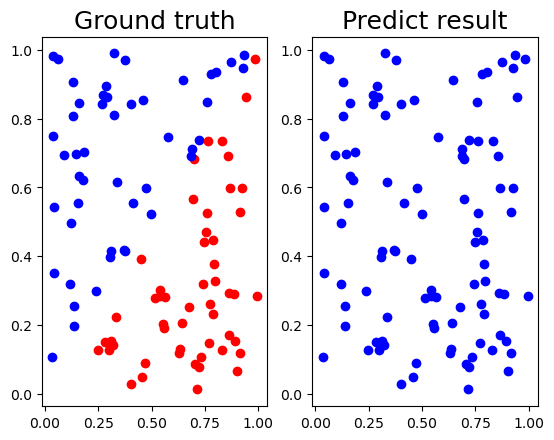

In [49]:
show_result(x, y, pred)